# Final Project Presentation
### Abigail Paterson

## Question
### What Factors Effect Children's Mental Health at School
    - Determine which factors have the strongest impact on outcome
    - Look at geographical differences between factors
    - Looking specifically at California due to data constraints

Focusing specifically on certain negative factors in a school environment

## Features

### Output
    - Percent of students reporting depression related feelings
    
### Inputs
    - Bullying at school
    - Student gang involvement
    - Students truant from school in a year
    

## Data Characteristics

(There are some problems with the data which will be discussed later)

    - Unit of analysis is one grade level in a county for one year
    - Features measured in percents
    - Data is sourced from kidsdata.org

## Methods

#### Methods and Tools I Considered Using
    - BeautifulSoup for webscraping
    - Pandas for data manipulation
    - SciKit Learn for machine learning
    - ggplot, pyplot, and geopandas for visualizations

## Methods
#### Methods and Tools I Am Currently Using

    - Selenium for webscraping
    - Pandas for data manipulation
    - SciKit Learn for machine learning
    - ggplot, pyplot, and geopandas for visualizations

### NOTE THE NEXT CODE CHUNK. 
For the presentation I used a downloadable version of my data for convienience and proof of concept.
Next code chunk has an example of using selenium to scrape the code


In [1]:
# download all the data
#import necessary packages
import pandas as pd
import requests
import lxml
import html5lib
from bs4 import BeautifulSoup
import time # To put the system to sleep
import random # for random numbers
import warnings
import sqlite3
import missingno as miss
from selenium import webdriver
from plotnine import *
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#urls for emotional health

#2017-2019
url_depression_19 = "https://www.kidsdata.org/topic/662/depressive-feelings-grade/table#fmt=943&loc=2,127,347,1763,331,348,336,171,321,345,357,332,324,369,358,362,360,337,327,364,356,217,353,328,354,323,352,320,339,334,365,343,330,367,344,355,366,368,265,349,361,4,273,59,370,326,333,322,341,338,350,342,329,325,359,351,363,340,335&tf=134&ch=69,305,306,431,1177,1176&sortColumnId=0&sortType=asc"
#2015 - 2017
url_depression_17 = "https://www.kidsdata.org/topic/662/depressive-feelings-grade/table#fmt=943&loc=2,127,347,1763,331,348,336,171,321,345,357,332,324,369,358,362,360,337,327,364,356,217,353,328,354,323,352,320,339,334,365,343,330,367,344,355,366,368,265,349,361,4,273,59,370,326,333,322,341,338,350,342,329,325,359,351,363,340,335&tf=122&ch=69,305,306,431,1177,1176&sortColumnId=0&sortType=asc"
#2013 - 2015
url_depression_15 = "https://www.kidsdata.org/topic/662/depressive-feelings-grade/table#fmt=943&loc=2,127,347,1763,331,348,336,171,321,345,357,332,324,369,358,362,360,337,327,364,356,217,353,328,354,323,352,320,339,334,365,343,330,367,344,355,366,368,265,349,361,4,273,59,370,326,333,322,341,338,350,342,329,325,359,351,363,340,335&tf=93&ch=69,305,306,431,1177,1176&sortColumnId=0&sortType=asc"
#2011-2013
url_depression_13 = "https://www.kidsdata.org/topic/662/depressive-feelings-grade/table#fmt=943&loc=2,127,347,1763,331,348,336,171,321,345,357,332,324,369,358,362,360,337,327,364,356,217,353,328,354,323,352,320,339,334,365,343,330,367,344,355,366,368,265,349,361,4,273,59,370,326,333,322,341,338,350,342,329,325,359,351,363,340,335&tf=81&ch=69,305,306,431,1177,1176&sortColumnId=0&sortType=asc"
urls_depression = [url_depression_19, url_depression_17, url_depression_15, url_depression_13]

driver = webdriver.Chrome('C:/chromedriver.exe')
driver.get(url_depression_19)
html = driver.page_source

tables = pd.read_html(html)

driver.close()

In [2]:
tables

[        California Percent       
        Grade Level     Yes     No
 0          Grade 7   30.4%  69.6%
 1          Grade 9   32.6%  67.4%
 2         Grade 11   36.6%  63.4%
 3  Non-Traditional   32.1%  67.9%,
     Alameda County Percent       
        Grade Level     Yes     No
 0          Grade 7   25.6%  74.4%
 1          Grade 9   29.9%  70.1%
 2         Grade 11   35.2%  64.8%
 3  Non-Traditional   37.4%  62.6%,
      Alpine County Percent     
        Grade Level     Yes   No
 0          Grade 7       S    S
 1          Grade 9     NaN  NaN
 2         Grade 11     NaN  NaN
 3  Non-Traditional     NaN  NaN,
      Amador County Percent       
        Grade Level     Yes     No
 0          Grade 7   32.4%  67.6%
 1          Grade 9   39.0%  61.0%
 2         Grade 11   34.8%  65.2%
 3  Non-Traditional       S      S,
       Butte County Percent       
        Grade Level     Yes     No
 0          Grade 7   30.0%  70.0%
 1          Grade 9   29.1%  70.9%
 2         Grade 11   21.8% 

In [4]:

#download the data
depression_13 = pd.read_csv("depression_13.csv")
depression_13["year"] = "2013"

depression_15 = pd.read_csv("depression_15.csv")
depression_15["year"] = "2015"

depression_17 = pd.read_csv("depression_17.csv")
depression_17["year"] = "2017"

depression_all = pd.concat([depression_13, depression_15, depression_17])

depression_all = depression_all[depression_all['Data'] != "N_A"]
depression_all = depression_all[depression_all['Data'] != "S"]
depression_all = depression_all[depression_all["StudentResponse"] != "No"]

depression_all = depression_all.drop(columns= ["FIPSCode", "LocationType", "DataFormat", "TimeFrame", "StudentResponse"])

depression_all = depression_all.rename(columns={"Data": "students_reporting_feelings_of_depression"})
depression_all["students_reporting_feelings_of_depression"] = depression_all["students_reporting_feelings_of_depression"].astype(float)
depression_all = depression_all.reset_index(drop=True)

depression_all = depression_all.sort_values(by=["Location", "year", "GradeLevel"])

da_pre_dummy = depression_all

#dummy grade level
grade_dummies = pd.get_dummies(depression_all.GradeLevel)
grade_dummies.columns = [c.lower().replace(" ","_") for c in grade_dummies.columns]
grade_dummies = grade_dummies.drop(['non_traditional'],axis=1) # Baseline
depression_all = pd.concat([depression_all.drop(['GradeLevel'],axis=1),grade_dummies],axis=1)

#country grade level
c_dummies = pd.get_dummies(depression_all.Location)
c_dummies.columns = [c.lower().replace(" ","_") for c in c_dummies.columns]
c_dummies = c_dummies.drop(['alameda_county'],axis=1) # Baseline
depression_all = pd.concat([depression_all.drop(['Location'],axis=1),c_dummies],axis=1)



#cleaning data for bullying
bullying_13 = pd.read_csv("bullying_13.csv")
bullying_13["year"] = "2013"

bullying_15 = pd.read_csv("bullying_15.csv")
bullying_15["year"] = "2015"

bullying_17 = pd.read_csv("bullying_17.csv")
bullying_17["year"] = "2017"

bullying_all = pd.concat([bullying_13, bullying_15, bullying_17])
bullying_all = bullying_all.drop(columns= ["FIPSCode", "LocationType", "DataFormat", "TimeFrame", ])

bullying_all = bullying_all[bullying_all['Data'] != "N_A"]
bullying_all = bullying_all[bullying_all['Data'] != "S"]
bullying_all = bullying_all[bullying_all['StudentResponse'] != "None"]
bullying_all = bullying_all.drop(columns=["StudentResponse"])
bullying_all = bullying_all.rename(columns={"Data": "students_bullied_at_school"})

bullying_all = bullying_all.sort_values(by=["Location", "year", "GradeLevel"])
bullying_all = bullying_all.reset_index(drop=True)


#cleaning data for gang involvement
gang_13 = pd.read_csv("gang_13.csv")
gang_13["year"] = "2013"

gang_15 = pd.read_csv("gang_15.csv")
gang_15["year"] = "2015"

gang_17 = pd.read_csv("gang_17.csv")
gang_17["year"] = "2017"

gang_all = pd.concat([gang_13, gang_15, gang_17])

gang_all = gang_all[gang_all['Data'] != "N_A"]
gang_all = gang_all[gang_all['Data'] != "S"]
gang_all = gang_all[gang_all['StudentResponse'] != "No"]

gang_all = gang_all.drop(columns= ["FIPSCode", "LocationType", "DataFormat", "TimeFrame", "StudentResponse"])
gang_all = gang_all.rename(columns={"Data": "students_involved_with_gang_activity"})

gang_all = gang_all.sort_values(by=["Location", "year", "GradeLevel"])
gang_all = gang_all[["Location", "year", "GradeLevel", "students_involved_with_gang_activity"]]
gang_all = gang_all.reset_index(drop=True)


#data for truancy
tr_7 = pd.read_csv("truancy_all.csv")
tr_7["GradeLevel"] = "Grade 7"

tr_9 = pd.read_csv("truancy_all.csv")
tr_9["GradeLevel"] = "Grade 9"

tr_11 = pd.read_csv("truancy_all.csv")
tr_11["GradeLevel"] = "Grade 11"

tr_nt = pd.read_csv("truancy_all.csv") 
tr_nt["GradeLevel"] = "Non_traditional"

tr_all = pd.concat([tr_7, tr_9, tr_11, tr_nt])
tr_all = tr_all.sort_values(by=["Location"])
tr_all = tr_all.replace("2016", "2017")

tr_all = tr_all.drop(columns=["FIPSCode", "LocationType", "DataFormat"])

tr_all = tr_all[tr_all['Data'] != "N_A"]
tr_all = tr_all[tr_all['Data'] != "S"]

tr_all = tr_all.rename(columns={"Data": "students_truant_yearly_per_100"})
tr_all = tr_all.rename(columns={"TimeFrame" : "year"})
tr_all["year"] = tr_all["year"].astype(object)
tr_all = tr_all.sort_values(by=["Location", "year", "GradeLevel"])
tr_all = tr_all.reset_index(drop=True)


#create feature dataframe
#bullying all is the shortest so we left join to that
df_factors = gang_all.merge(bullying_all, how="left", on =["Location", "GradeLevel", "year"] )
df_factors_tr = df_factors.merge(tr_all, how='left', on =["Location"] )
tr = df_factors_tr["students_truant_yearly_per_100"].astype("float")

df_factors["students_truant_yearly_per_100"] = tr
df_factors["students_involved_with_gang_activity"] = df_factors["students_involved_with_gang_activity"].astype("float")
df_factors["students_bullied_at_school"] = df_factors["students_bullied_at_school"].astype("float")

## Initial Findings

This is still a work in progress. Current findings are in the data exploration

## What I have done so far
    - Scraped most of my data from the website
    - Merged and cleaned and preprocessed the data I have
    - Currently working to understand how to best use the data I have

## Analyze Output Variable
    - Trying to predict Depression Related Feelings in Students
    - Using as a metric of children's emotional wellbeing
    

In [3]:
da_pre_dummy.head()

,Location,GradeLevel,students_reporting_feelings_of_depression,year
1,Alameda County,Grade 11,28.5,2013
42,Alameda County,Grade 7,24.6,2013
79,Alameda County,Grade 9,28.1,2013
120,Alameda County,Non_Traditional,34.2,2013
133,Alameda County,Grade 11,33.3,2015


In [10]:
depression_all.head()

,students_reporting_feelings_of_depression,year,grade_11,grade_7,grade_9,amador_county,butte_county,calaveras_county,california,colusa_county,...,sonoma_county,stanislaus_county,sutter_county,tehama_county,trinity_county,tulare_county,tuolumne_county,ventura_county,yolo_county,yuba_county
1,28.5,2013,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,24.6,2013,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
79,28.1,2013,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,34.2,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
133,33.3,2015,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Histogram of depression variable

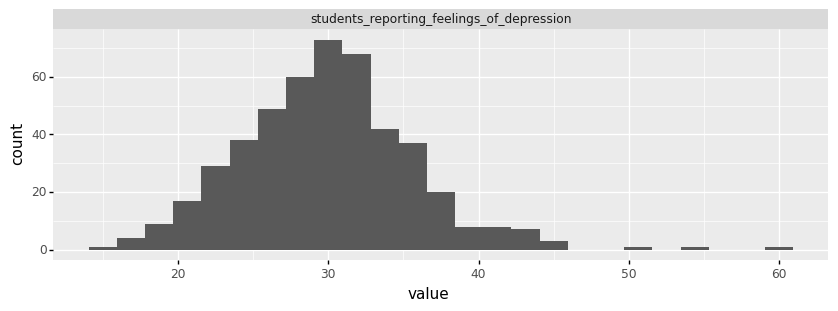

<ggplot: (104178271519)>

In [8]:
d = da_pre_dummy.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25})
)


## Analyze Input Variables

We will look at gang activity, truancy, and bullying

In [25]:
df_factors.head()

,Location,year,GradeLevel,students_involved_with_gang_activity,students_bullied_at_school,students_truant_yearly_per_100
0,Alameda County,2013,Grade 11,6.8,26.5,32.2
1,Alameda County,2013,Grade 7,6.9,39.7,32.2
2,Alameda County,2013,Grade 9,6.5,34.5,32.2
3,Alameda County,2013,Non_Traditional,10.6,26.4,32.2
4,Alameda County,2015,Grade 11,5.1,26.5,27.7


### Histogram of feature variables

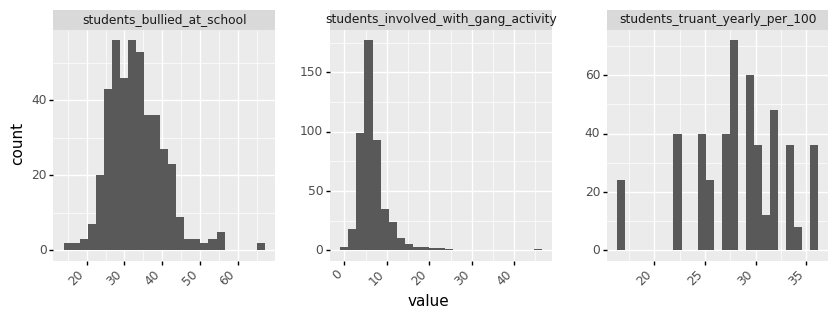

<ggplot: (104183333075)>

In [41]:
d = df_factors.select_dtypes(include="float").melt()
(
    ggplot(d,aes(x="value")) +
    geom_histogram(bins=25) +
    facet_wrap("variable",scales='free') +
    theme(figure_size=(10,3),
          subplots_adjust={'wspace':0.25},
          axis_text_x=element_text(rotation=45, hjust=1))
    
)

## Lessons Learned Thus Far
    

#### Overhead issues

    - Geopandas is very hard to download on a PC
    - My data would not load using BeautifulSoup. It was dynamically loaded, so I needed to use Selenium

#### Data Troubleshooting
    - My data is fairly small(less than 700 observations)
    - The way the data had been collected, it seems it might have been the same students surveyed across multiple years

#### Limitations

    - This data is not very robust
    - Would like a better measure of emotional wellbeing
    - Wish I had more entries